# Import Data

In [2]:
import numpy as np
import pandas as pd
import ast

data=pd.read_excel("https://docs.google.com/uc?id=1rwW3roc-ELRu-KDtau7NUz-GCF2M1yJJ")
for i in data.columns[6:9]:
  print(i)
  data[i] = data[i].apply(ast.literal_eval)
for i in data.columns[10:13]:
  print(i)
  data[i] = data[i].apply(ast.literal_eval)
print("type liste done")

avis_token
avis_token_correct
avis_token_correct_sw
avis_token_en
avis_token_correct_en
avis_token_correct_en_sw
type liste done


In [3]:
print(len(data))
df=data[data["avis_clean_final"].isnull()==False]
df=df[df["avis_clean_final_en"].isnull()==False]
len(df)

24105


24103

In [7]:
df=df.reset_index(drop=True)

In [10]:
df['assureur'].unique()

array(['Direct Assurance', "L'olivier Assurance", 'Matmut',
       'Néoliane Santé', 'APRIL', 'SantéVet', 'Mercer', 'Generali',
       'Allianz', 'APRIL Moto', 'Cegema Assurances', 'LCL', 'Afer',
       'Pacifica', 'SwissLife', 'MAAF', 'Solly Azar', 'GMF', 'AMV',
       'CNP Assurances', 'MAIF', 'Sogecap', 'Harmonie Mutuelle',
       'Mutuelle des Motards', 'MACIF', 'Eurofil', 'Active Assurances',
       'AXA', 'Sogessur', 'Ag2r La Mondiale', 'Mgen', "Zen'Up", 'MGP',
       'Intériale', 'Génération', 'Cardif', 'Santiane', 'Eca Assurances',
       'Groupama', "Assur O'Poil", 'MMA', 'MetLife', 'Crédit Mutuel',
       'Afi Esca', 'Gan', 'Magnolia', 'Suravenir', 'Assur Bon Plan',
       'AssurOnline', 'Carac', 'Mapa', 'Malakoff Humanis',
       'Euro-Assurance', 'Peyrac Assurances', 'Sma', 'Hiscox'],
      dtype=object)

In [29]:
df=pd.merge(df,pd.get_dummies(df['assureur'], prefix='assureur'), left_index=True, right_index=True).drop(columns=['assureur'])
df=pd.merge(df,pd.get_dummies(df['produit'], prefix='produit'), left_index=True, right_index=True).drop(columns=['produit'])

In [30]:
df["date_com_y"]=pd.DatetimeIndex(df['date_com']).year
df["date_com_m"]=pd.DatetimeIndex(df['date_com']).month
df["date_com_d"]=pd.DatetimeIndex(df['date_com']).day

df["date_xp_d"]=pd.DatetimeIndex(df['date_xp']).year
df["date_xp_d"]=pd.DatetimeIndex(df['date_xp']).month

df=df.drop(columns=['date_com','date_xp'])


In [37]:
# longueur commentaire
# nb mots
# nb ponctuation
import string
count = lambda l1, l2: len(list(filter(lambda c: c in l2, l1)))

df["nb_punct"]=df["avis"].apply(lambda x: count(x, string.punctuation))
df["nb_char"]=df["avis"].apply(lambda x: len(x))
df["nb_mots"]=df['avis_token'].apply(lambda x: len(x[0]))


In [45]:
df.columns

Index(['note', 'avis', 'avis_token', 'avis_token_correct',
       'avis_token_correct_sw', 'avis_en', 'avis_token_en',
       'avis_token_correct_en', 'avis_token_correct_en_sw', 'avis_clean_final',
       'avis_clean_final_en', 'assureur_AMV', 'assureur_APRIL',
       'assureur_APRIL Moto', 'assureur_AXA', 'assureur_Active Assurances',
       'assureur_Afer', 'assureur_Afi Esca', 'assureur_Ag2r La Mondiale',
       'assureur_Allianz', 'assureur_Assur Bon Plan', 'assureur_Assur O'Poil',
       'assureur_AssurOnline', 'assureur_CNP Assurances', 'assureur_Carac',
       'assureur_Cardif', 'assureur_Cegema Assurances',
       'assureur_Crédit Mutuel', 'assureur_Direct Assurance',
       'assureur_Eca Assurances', 'assureur_Euro-Assurance',
       'assureur_Eurofil', 'assureur_GMF', 'assureur_Gan', 'assureur_Generali',
       'assureur_Groupama', 'assureur_Génération',
       'assureur_Harmonie Mutuelle', 'assureur_Hiscox', 'assureur_Intériale',
       'assureur_L'olivier Assurance', 'assu

In [46]:
final=df.drop(columns=['avis', 'avis_token', 'avis_token_correct',
       'avis_token_correct_sw', 'avis_en', 'avis_token_en',
       'avis_token_correct_en', 'avis_token_correct_en_sw', 'avis_clean_final',
       'avis_clean_final_en'])

## Embeddings et Sentiment Score

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [52]:
train_glove=pd.read_csv("/content/drive/MyDrive/PINCET_Bruno_NLP_Project_2/Vectorisation/train_review_glove.csv",sep=",",header=0)
train_w2v= pd.read_csv("https://drive.google.com/uc?id=1nKDFb6ZEo7y_rgaZB6BWlreAqqWM9cgJ",sep=",",header=0)
train_sentiment=pd.read_csv("/content/drive/MyDrive/PINCET_Bruno_NLP_Project_2/Sentiment/train_sentiment_score.csv",sep=",",header=0).iloc[:, 1:]

In [53]:
final=pd.merge(final,train_w2v, left_index=True, right_index=True)
final=pd.merge(final,train_glove.reset_index(),left_index=True, right_index=True)
final=pd.merge(final,train_sentiment.reset_index(),left_index=True, right_index=True)

<ipython-input-53-d30335fa456a>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  final=pd.merge(final,train_glove.reset_index(),left_index=True, right_index=True)


In [57]:
len(final.columns)

480

In [55]:
final

,note,assureur_AMV,assureur_APRIL,assureur_APRIL Moto,assureur_AXA,assureur_Active Assurances,assureur_Afer,assureur_Afi Esca,assureur_Ag2r La Mondiale,assureur_Allianz,...,93_y,94_y,95_y,96_y,97_y,98_y,99_y,index,bert_scores,vader_compound
0,5,0,0,0,0,0,0,0,0,0,...,-0.140502,0.119083,0.145925,-0.009067,-0.199668,0.030138,-0.052544,0,0.999785,0.8834
1,4,0,0,0,0,0,0,0,0,0,...,-0.019018,0.114189,-0.001465,-0.033510,-0.068481,-0.059315,0.007828,1,0.995292,0.5521
2,5,0,0,0,0,0,0,0,0,0,...,0.109892,0.015628,0.228390,-0.135483,-0.106096,-0.002397,0.014991,2,0.999562,0.5563
3,4,0,0,0,0,0,0,0,0,0,...,-0.176307,0.061455,-0.086604,0.061787,-0.197633,0.102601,-0.050771,3,0.994402,0.6705
4,1,0,0,0,0,0,0,0,0,0,...,-0.064365,0.161900,0.064813,-0.069028,-0.170925,-0.083993,-0.007467,4,0.081235,0.3119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24098,1,0,0,0,0,0,0,0,0,0,...,0.028840,0.077645,0.179132,-0.057556,-0.077357,0.078056,-0.072186,24098,0.140807,0.7701
24099,1,0,0,0,0,0,0,0,0,1,...,-0.177516,0.156815,-0.015929,-0.009912,-0.257319,-0.119461,0.011908,24099,0.001398,-0.3875
24100,1,0,0,0,0,0,0,0,0,0,...,-0.105739,0.165955,0.097614,-0.031835,-0.218240,-0.048075,-0.026805,24100,0.136346,-0.5282
24101,3,0,0,0,0,0,0,0,0,0,...,-0.043213,0.174467,-0.041947,0.017037,-0.079614,-0.082807,0.008460,24101,0.101055,0.8519


In [56]:
print(final.columns.tolist())

['note', 'assureur_AMV', 'assureur_APRIL', 'assureur_APRIL Moto', 'assureur_AXA', 'assureur_Active Assurances', 'assureur_Afer', 'assureur_Afi Esca', 'assureur_Ag2r La Mondiale', 'assureur_Allianz', 'assureur_Assur Bon Plan', "assureur_Assur O'Poil", 'assureur_AssurOnline', 'assureur_CNP Assurances', 'assureur_Carac', 'assureur_Cardif', 'assureur_Cegema Assurances', 'assureur_Crédit Mutuel', 'assureur_Direct Assurance', 'assureur_Eca Assurances', 'assureur_Euro-Assurance', 'assureur_Eurofil', 'assureur_GMF', 'assureur_Gan', 'assureur_Generali', 'assureur_Groupama', 'assureur_Génération', 'assureur_Harmonie Mutuelle', 'assureur_Hiscox', 'assureur_Intériale', "assureur_L'olivier Assurance", 'assureur_LCL', 'assureur_MAAF', 'assureur_MACIF', 'assureur_MAIF', 'assureur_MGP', 'assureur_MMA', 'assureur_Magnolia', 'assureur_Malakoff Humanis', 'assureur_Mapa', 'assureur_Matmut', 'assureur_Mercer', 'assureur_MetLife', 'assureur_Mgen', 'assureur_Mutuelle des Motards', 'assureur_Néoliane Santé', 

# Lazy Predict

In [63]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(final, test_size=0.2,random_state=42) 

X_train=train.iloc[:, 1:]
y_train= train.iloc[:, 0]

X_test=test.iloc[:, 1:]
y_test= test.iloc[:, 0]



In [64]:
%%capture
!pip install lazypredict
!pip install ml_metrics
import lazypredict
from lazypredict.Supervised import LazyClassifier
from ml_metrics import rmse



In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=rmse)
models_c,predictions_c = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [34:57<00:00, 72.32s/it]


In [ ]:
models_c

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,rmse,Time Taken
Model,,,,,,
LinearDiscriminantAnalysis,0.53,0.47,None,0.52,0.99,3.26
LogisticRegression,0.53,0.45,None,0.50,0.99,7.20
SVC,0.55,0.45,None,0.50,1.01,198.19
LGBMClassifier,0.54,0.45,None,0.50,1.00,91.84
RidgeClassifier,0.54,0.45,None,0.49,1.07,1.23
RidgeClassifierCV,0.54,0.45,None,0.49,1.07,2.58
CalibratedClassifierCV,0.54,0.44,None,0.48,1.06,666.67
NuSVC,0.51,0.44,None,0.48,1.18,333.75
XGBClassifier,0.53,0.43,None,0.47,1.05,264.94


In [ ]:
import lazypredict
from lazypredict.Supervised import LazyRegressor

reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models_r,predictions_r = reg.fit(X_train, X_test, y_train, y_test)

[('AdaBoostRegressor', <class 'sklearn.ensemble._weight_boosting.AdaBoostRegressor'>), ('BaggingRegressor', <class 'sklearn.ensemble._bagging.BaggingRegressor'>), ('BayesianRidge', <class 'sklearn.linear_model._bayes.BayesianRidge'>), ('DecisionTreeRegressor', <class 'sklearn.tree._classes.DecisionTreeRegressor'>), ('DummyRegressor', <class 'sklearn.dummy.DummyRegressor'>), ('ElasticNet', <class 'sklearn.linear_model._coordinate_descent.ElasticNet'>), ('ElasticNetCV', <class 'sklearn.linear_model._coordinate_descent.ElasticNetCV'>), ('ExtraTreeRegressor', <class 'sklearn.tree._classes.ExtraTreeRegressor'>), ('ExtraTreesRegressor', <class 'sklearn.ensemble._forest.ExtraTreesRegressor'>), ('GammaRegressor', <class 'sklearn.linear_model._glm.glm.GammaRegressor'>), ('GaussianProcessRegressor', <class 'sklearn.gaussian_process._gpr.GaussianProcessRegressor'>), ('GradientBoostingRegressor', <class 'sklearn.ensemble._gb.GradientBoostingRegressor'>), ('HistGradientBoostingRegressor', <class 's

  0%|          | 0/40 [00:00<?, ?it/s]


 model 0: 
AdaBoostRegressor <class 'sklearn.ensemble._weight_boosting.AdaBoostRegressor'>


  2%|▎         | 1/40 [01:00<39:16, 60.42s/it]


 model 1: 
BaggingRegressor <class 'sklearn.ensemble._bagging.BaggingRegressor'>


  5%|▌         | 2/40 [02:35<51:21, 81.08s/it]


 model 2: 
BayesianRidge <class 'sklearn.linear_model._bayes.BayesianRidge'>


  8%|▊         | 3/40 [02:38<27:48, 45.10s/it]


 model 3: 
DecisionTreeRegressor <class 'sklearn.tree._classes.DecisionTreeRegressor'>


 10%|█         | 4/40 [02:53<20:02, 33.42s/it]


 model 4: 
DummyRegressor <class 'sklearn.dummy.DummyRegressor'>


 12%|█▎        | 5/40 [02:54<12:32, 21.51s/it]


 model 5: 
ElasticNet <class 'sklearn.linear_model._coordinate_descent.ElasticNet'>


 15%|█▌        | 6/40 [02:54<08:10, 14.44s/it]


 model 6: 
ElasticNetCV <class 'sklearn.linear_model._coordinate_descent.ElasticNetCV'>


 18%|█▊        | 7/40 [03:10<08:04, 14.68s/it]


 model 7: 
ExtraTreeRegressor <class 'sklearn.tree._classes.ExtraTreeRegressor'>


 20%|██        | 8/40 [03:12<05:43, 10.73s/it]


 model 8: 
ExtraTreesRegressor <class 'sklearn.ensemble._forest.ExtraTreesRegressor'>


 22%|██▎       | 9/40 [06:15<33:19, 64.51s/it]


 model 9: 
GammaRegressor <class 'sklearn.linear_model._glm.glm.GammaRegressor'>


 25%|██▌       | 10/40 [06:15<22:25, 44.85s/it]


 model 10: 
GradientBoostingRegressor <class 'sklearn.ensemble._gb.GradientBoostingRegressor'>


 28%|██▊       | 11/40 [11:16<59:28, 123.06s/it]


 model 11: 
HistGradientBoostingRegressor <class 'sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingRegressor'>


 30%|███       | 12/40 [11:27<41:28, 88.89s/it] 


 model 12: 
HuberRegressor <class 'sklearn.linear_model._huber.HuberRegressor'>


 32%|███▎      | 13/40 [11:39<29:37, 65.84s/it]


 model 13: 
KNeighborsRegressor <class 'sklearn.neighbors._regression.KNeighborsRegressor'>


 35%|███▌      | 14/40 [11:45<20:36, 47.57s/it]


 model 14: 
KernelRidge <class 'sklearn.kernel_ridge.KernelRidge'>


 38%|███▊      | 15/40 [13:18<25:30, 61.22s/it]


 model 15: 
Lars <class 'sklearn.linear_model._least_angle.Lars'>


 40%|████      | 16/40 [13:19<17:16, 43.19s/it]


 model 16: 
LarsCV <class 'sklearn.linear_model._least_angle.LarsCV'>


 42%|████▎     | 17/40 [13:25<12:15, 31.99s/it]


 model 17: 
Lasso <class 'sklearn.linear_model._coordinate_descent.Lasso'>


 45%|████▌     | 18/40 [13:25<08:15, 22.54s/it]


 model 18: 
LassoCV <class 'sklearn.linear_model._coordinate_descent.LassoCV'>


 48%|████▊     | 19/40 [13:41<07:07, 20.35s/it]


 model 19: 
LassoLars <class 'sklearn.linear_model._least_angle.LassoLars'>


 50%|█████     | 20/40 [13:41<04:49, 14.46s/it]


 model 20: 
LassoLarsCV <class 'sklearn.linear_model._least_angle.LassoLarsCV'>


 52%|█████▎    | 21/40 [13:48<03:50, 12.14s/it]


 model 21: 
LassoLarsIC <class 'sklearn.linear_model._least_angle.LassoLarsIC'>


 55%|█████▌    | 22/40 [13:51<02:47,  9.31s/it]


 model 22: 
LinearRegression <class 'sklearn.linear_model._base.LinearRegression'>


 57%|█████▊    | 23/40 [13:52<01:57,  6.92s/it]


 model 23: 
LinearSVR <class 'sklearn.svm._classes.LinearSVR'>


 60%|██████    | 24/40 [14:26<03:59, 14.94s/it]


 model 24: 
MLPRegressor <class 'sklearn.neural_network._multilayer_perceptron.MLPRegressor'>


 62%|██████▎   | 25/40 [15:18<06:30, 26.02s/it]


 model 25: 
NuSVR <class 'sklearn.svm._classes.NuSVR'>


 65%|██████▌   | 26/40 [24:42<43:44, 187.44s/it]


 model 26: 
OrthogonalMatchingPursuit <class 'sklearn.linear_model._omp.OrthogonalMatchingPursuit'>


 68%|██████▊   | 27/40 [24:42<28:28, 131.45s/it]


 model 27: 
OrthogonalMatchingPursuitCV <class 'sklearn.linear_model._omp.OrthogonalMatchingPursuitCV'>


 70%|███████   | 28/40 [24:47<18:40, 93.37s/it] 


 model 28: 
PassiveAggressiveRegressor <class 'sklearn.linear_model._passive_aggressive.PassiveAggressiveRegressor'>


 72%|███████▎  | 29/40 [24:48<12:01, 65.60s/it]


 model 29: 
PoissonRegressor <class 'sklearn.linear_model._glm.glm.PoissonRegressor'>


 75%|███████▌  | 30/40 [24:49<07:42, 46.27s/it]


 model 30: 
RANSACRegressor <class 'sklearn.linear_model._ransac.RANSACRegressor'>


 78%|███████▊  | 31/40 [25:08<05:43, 38.14s/it]


 model 31: 
RandomForestRegressor <class 'sklearn.ensemble._forest.RandomForestRegressor'>


 80%|████████  | 32/40 [40:55<41:25, 310.72s/it]


 model 32: 
Ridge <class 'sklearn.linear_model._ridge.Ridge'>


 82%|████████▎ | 33/40 [40:56<25:24, 217.72s/it]


 model 33: 
RidgeCV <class 'sklearn.linear_model._ridge.RidgeCV'>


 85%|████████▌ | 34/40 [40:58<15:19, 153.17s/it]


 model 34: 
SGDRegressor <class 'sklearn.linear_model._stochastic_gradient.SGDRegressor'>


 88%|████████▊ | 35/40 [40:59<08:57, 107.43s/it]


 model 35: 
SVR <class 'sklearn.svm._classes.SVR'>


 90%|█████████ | 36/40 [49:53<15:41, 235.44s/it]


 model 36: 
TransformedTargetRegressor <class 'sklearn.compose._target.TransformedTargetRegressor'>


 92%|█████████▎| 37/40 [49:54<08:15, 165.22s/it]


 model 37: 
TweedieRegressor <class 'sklearn.linear_model._glm.glm.TweedieRegressor'>


 95%|█████████▌| 38/40 [49:55<03:51, 115.90s/it]


 model 38: 
XGBRegressor <class 'xgboost.sklearn.XGBRegressor'>
[09:38:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 98%|█████████▊| 39/40 [50:48<01:36, 96.84s/it] 


 model 39: 
LGBMRegressor <class 'lightgbm.sklearn.LGBMRegressor'>


100%|██████████| 40/40 [51:07<00:00, 76.68s/it]

{'Model': ['AdaBoostRegressor', 'BaggingRegressor', 'BayesianRidge', 'DecisionTreeRegressor', 'DummyRegressor', 'ElasticNet', 'ElasticNetCV', 'ExtraTreeRegressor', 'ExtraTreesRegressor', 'GammaRegressor', 'GradientBoostingRegressor', 'HistGradientBoostingRegressor', 'HuberRegressor', 'KNeighborsRegressor', 'KernelRidge', 'Lars', 'LarsCV', 'Lasso', 'LassoCV', 'LassoLars', 'LassoLarsCV', 'LassoLarsIC', 'LinearRegression', 'LinearSVR', 'MLPRegressor', 'NuSVR', 'OrthogonalMatchingPursuit', 'OrthogonalMatchingPursuitCV', 'PassiveAggressiveRegressor', 'PoissonRegressor', 'RANSACRegressor', 'RandomForestRegressor', 'Ridge', 'RidgeCV', 'SGDRegressor', 'SVR', 'TransformedTargetRegressor', 'TweedieRegressor', 'XGBRegressor', 'LGBMRegressor'], 'Adjusted R-Squared': [0.5677566937647243, 0.5987704199087283, 0.6152487298126914, 0.23870046718533755, -0.11045843518584819, 0.31661047946633847, 0.6158970624287998, 0.19958269113992544, 0.6489583044246588, 0.5458494584044349, 0.6440618994887262, 0.6594767

In [ ]:
models_r

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LGBMRegressor,0.66,0.70,0.85,19.33
HistGradientBoostingRegressor,0.66,0.69,0.86,10.73
NuSVR,0.66,0.69,0.86,564.04
SVR,0.65,0.68,0.87,534.11
ExtraTreesRegressor,0.65,0.68,0.87,182.77
XGBRegressor,0.64,0.68,0.87,52.36
GradientBoostingRegressor,0.64,0.68,0.87,300.37
RandomForestRegressor,0.64,0.68,0.88,946.71
LassoLarsIC,0.62,0.65,0.91,2.70


In [ ]:
# import os
# os.kill(os.getpid(), 9)

# Optimization of the best models

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt


## Preprocessing

In [69]:
print(len(X_train))
len(X_train.columns)

19282


479

In [70]:
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer, MissingIndicator
from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score,
    roc_auc_score,
    f1_score,
    r2_score,
    mean_squared_error,
)

def get_card_split(df, cols, n=11):
    cond = df[cols].nunique() > n
    card_high = cols[cond]
    card_low = cols[~cond]
    return card_low, card_high


numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="mean")), ("scaler", StandardScaler())]
)

categorical_transformer_low = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
        ("encoding", OneHotEncoder(handle_unknown="ignore", sparse=False)),
    ]
)

categorical_transformer_high = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
        ("encoding", OrdinalEncoder()),
    ]
)

numeric_features = X_train.select_dtypes(include=[np.number]).columns
categorical_features = X_train.select_dtypes(include=["object"]).columns
categorical_low, categorical_high = get_card_split(X_train, categorical_features)
preprocessor = ColumnTransformer(
            transformers=[
                ("numeric", numeric_transformer, numeric_features),
                ("categorical_low", categorical_transformer_low, categorical_low),
                ("categorical_high", categorical_transformer_high, categorical_high),
            ]
        )

## LGBMRegressor

In [ ]:
import lightgbm
from lightgbm import LGBMRegressor

name="LGBMRegressor"
model=LGBMRegressor
df_model_result = pd.DataFrame(columns = ["RMSE", "RMSE_round", "Learning_rate","L2_regul"])

#Params
lr=[0.01,0.1,0.15,0.2]
l2=[0,0.1, 0.001, 0.0001]

#Grid Search
for i in lr:
  for j in l2:
    pipe = Pipeline(steps=[("preprocessor", preprocessor), ("regressor", model(learning_rate=i,reg_lambda=j))])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    y_pred_r=[int(round(item, 0)) for item in y_pred]
    rmse_r = np.sqrt(mean_squared_error(y_test, y_pred_r))
    df2 = pd.DataFrame({"RMSE": [rmse],
                        "RMSE_round": [rmse_r],
                        "Learning_rate":[i],
                        "L2_regul":[j]})
    df_model_result=pd.concat([df_model_result,df2])
  

df_model_result.sort_values(by=['RMSE'])

,RMSE,RMSE_round,Learning_rate,L2_regul
0,0.85,0.91,0.10,0.00
0,0.85,0.91,0.10,0.00
0,0.85,0.91,0.10,0
0,0.85,0.91,0.10,0.10
0,0.85,0.92,0.15,0.10
0,0.86,0.92,0.15,0.00
0,0.86,0.92,0.15,0.00
0,0.86,0.92,0.15,0
0,0.86,0.92,0.20,0.00
0,0.86,0.92,0.20,0.00


0.8492278979727217


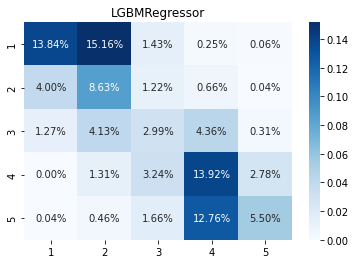

In [71]:
import lightgbm
from lightgbm import LGBMRegressor

name="LGBMRegressor"
model=LGBMRegressor

# Best params
lr=0.10
l2=0.001

pipe = Pipeline(steps=[("preprocessor", preprocessor), ("regressor", model(learning_rate=lr,reg_lambda=l2))])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
y_pred_r=[int(round(item, 0)) for item in y_pred]
rmse_r = np.sqrt(mean_squared_error(y_test, y_pred_r))
print(rmse)
cf_matrix = confusion_matrix(y_test, y_pred_r)
ax = plt.axes()
ax.set_title(name)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues',xticklabels=[1,2,3,4,5],yticklabels=[1,2,3,4,5],ax = ax)

In [ ]:
feature_imp = pd.DataFrame(sorted(zip(pipe.steps[1][1].feature_importances_, X_train.columns), reverse=True), columns=['Value','Feature']).head(10)

import plotly.express as px
fig = px.bar(feature_imp, y='Value', x='Feature', text_auto='.2s',
            title="Features importance LGBMRegressor")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

## HistGradientBoostingRegressor	

In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor
name="HistGradientBoostingRegressor arrondi à la classe"
model=HistGradientBoostingRegressor
df_model_result = pd.DataFrame(columns = ["RMSE", "RMSE_round", "Learning_rate","L2_regul"])

#Params
lr=[0.1,0.15,0.2]
l2=[0,0.1, 0.001, 0.0001]

#Grid Search
for i in lr:
  for j in l2:
    pipe = Pipeline(steps=[("preprocessor", preprocessor), ("regressor", model(learning_rate=i,l2_regularization=j))])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    y_pred_r=[int(round(item, 0)) for item in y_pred]
    rmse_r = np.sqrt(mean_squared_error(y_test, y_pred_r))
    df2 = pd.DataFrame({"RMSE": [rmse],
                        "RMSE_round": [rmse_r],
                        "Learning_rate":[i],
                        "L2_regul":[j]})
    df_model_result=pd.concat([df_model_result,df2])
  

df_model_result.sort_values(by=['RMSE','Learning_rate','L2_regul'])

,RMSE,RMSE_round,Learning_rate,L2_regul
0,0.85,0.91,0.10,0.00
0,0.85,0.91,0.10,0.00
0,0.85,0.92,0.10,0
0,0.85,0.92,0.10,0.10
0,0.85,0.92,0.15,0.00
0,0.86,0.92,0.15,0.00
0,0.86,0.93,0.15,0.10
0,0.86,0.93,0.20,0.10
0,0.86,0.93,0.20,0
0,0.86,0.93,0.15,0


0.8540829145223708


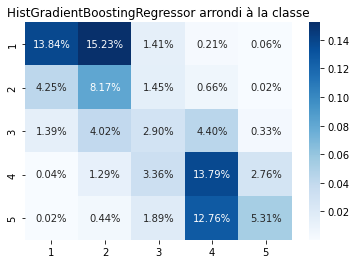

In [ ]:
# Best params
lr=0.1
l2=0.0001

pipe = Pipeline(steps=[("preprocessor", preprocessor), ("regressor", model(learning_rate=lr,l2_regularization=l2))])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
y_pred_r=[int(round(item, 0)) for item in y_pred]
rmse_r = np.sqrt(mean_squared_error(y_test, y_pred_r))
print(rmse)

cf_matrix = confusion_matrix(y_test, y_pred_r)
ax = plt.axes()
ax.set_title(name)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues',xticklabels=[1,2,3,4,5],yticklabels=[1,2,3,4,5],ax = ax)

##XGBRegressor

In [ ]:
import xgboost as xgb

name="XGBRegressor"
model=xgb.XGBRegressor
df_model_result = pd.DataFrame(columns = ["RMSE", "RMSE_round", "Learning_rate","L2_regul"])

#Params
lr=[0.01,0.1,0.2]
l2=[1,0,0.1, 0.001]

#Grid Search
for i in lr:
  for j in l2:
    pipe = Pipeline(steps=[("preprocessor", preprocessor), ("regressor", model(learning_rate=i,reg_lambda=j))])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    y_pred_r=[int(round(item, 0)) for item in y_pred]
    rmse_r = np.sqrt(mean_squared_error(y_test, y_pred_r))
    df2 = pd.DataFrame({"RMSE": [rmse],
                        "RMSE_round": [rmse_r],
                        "Learning_rate":[i],
                        "L2_regul":[j]})
    df_model_result=pd.concat([df_model_result,df2])
  

df_model_result.sort_values(by=['RMSE'])

[16:33:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:34:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:35:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:36:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:36:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:37:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:38:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:39:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

,RMSE,RMSE_round,Learning_rate,L2_regul
0,0.87,0.93,0.20,0.00
0,0.87,0.94,0.20,0
0,0.87,0.93,0.20,1
0,0.87,0.93,0.10,1
0,0.87,0.94,0.10,0.10
0,0.87,0.94,0.10,0.00
0,0.87,0.93,0.10,0
0,0.88,0.93,0.20,0.10
0,1.39,1.38,0.01,0
0,1.39,1.38,0.01,0.00


[16:46:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.8724196917406921


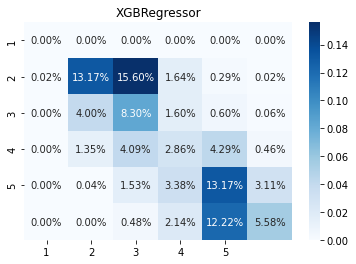

In [ ]:
# Best params
lr=0.2
l2=0.001

pipe = Pipeline(steps=[("preprocessor", preprocessor), ("regressor", model(learning_rate=lr,reg_lambda=l2))])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
y_pred_r=[int(round(item, 0)) for item in y_pred]
rmse_r = np.sqrt(mean_squared_error(y_test, y_pred_r))
print(rmse)

cf_matrix = confusion_matrix(y_test, y_pred_r)
ax = plt.axes()
ax.set_title(name)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues',xticklabels=[1,2,3,4,5],yticklabels=[1,2,3,4,5],ax = ax)

# Prédiction du test set (n'exécuter que le premier modèle pour avoir la bonne pipeline)

In [4]:
# Test data

datab=pd.read_excel("https://docs.google.com/uc?id=1mGm_bGARggYW5AEE9l5ofcD3DTZGB2WI")

for i in datab.columns[5:8]:
  print(i)
  datab[i] = datab[i].apply(ast.literal_eval)
for i in datab.columns[9:12]:
  print(i)
  datab[i] = datab[i].apply(ast.literal_eval)
print("type liste done")
datab.head()

datab["avis_clean_final"]=datab["avis_token_correct_sw"].apply(lambda x: ' '.join(x))
datab["avis_clean_final_en"]=datab["avis_token_correct_en_sw"].apply(lambda x: ' '.join(x))


print(len(datab))

avis_token
avis_token_correct
avis_token_correct_sw
avis_token_en
avis_token_correct_en
avis_token_correct_en_sw
type liste done
10332


In [9]:
dfb=datab.reset_index(drop=True)
dfb

,produit,assureur,date_com,date_xp,avis,avis_token,avis_token_correct,avis_token_correct_sw,avis_en,avis_token_en,avis_token_correct_en,avis_token_correct_en_sw,avis_clean_final,avis_clean_final_en
0,auto,L'olivier Assurance,2021-11-16,2021-11-21,satisfait des tarif et rapide j'attends de voi...,"[satisfait, des, tarif, et, rapide, j, attends...","[satisfait, des, tarif, et, rapide, j, attends...","[satisfait, tarif, rapide, attends, voir, temp...",satisfied with the price and fast i expect to ...,"[satisfied, with, the, price, and, fast, i, ex...","[satisfied, with, the, price, and, fast, i, ex...","[satisfied, price, fast, i, expect, see, temp,...",satisfait tarif rapide attends voir temp propo...,satisfied price fast i expect see temp i offer...
1,auto,L'olivier Assurance,2021-11-16,2021-11-21,"bon service, service réactif. tout en ligne pr...","[bon, service, service, réactif, tout, en, lig...","[bon, service, service, réactif, tout, en, lig...","[bon, service, service, réactif, tout, ligne, ...","good service, reactive service. all in practic...","[good, service, reactive, service, all, in, pr...","[good, service, reactive, service, all, in, pr...","[good, service, reactive, service, all, practi...",bon service service réactif tout ligne pratiqu...,good service reactive service all practical li...
2,auto,L'olivier Assurance,2021-11-16,2021-11-21,l’assurance olivier est une très bonne assuran...,"[l, assurance, olivier, est, une, très, bonne,...","[l, assurance, olivier, est, une, très, bonne,...","[l, assurance, olivier, très, bonne, assurance...",olivier insurance is a very good insurance i a...,"[olivier, insurance, is, a, very, good, insura...","[olivier, insurance, is, a, very, good, insura...","[olivier, insurance, good, insurance, i, satis...",l assurance olivier très bonne assurance satis...,olivier insurance good insurance i satisfied q...
3,auto,L'olivier Assurance,2021-11-16,2021-11-21,je suis satisfait de l'olivier assurances pas ...,"[je, suis, satisfait, de, l, olivier, assuranc...","[je, suis, satisfait, de, l, olivier, assuranc...","[je, satisfait, olivier, assurances, trop, che...",i am satisfied with the olive assurances not t...,"[i, am, satisfied, with, the, olive, assurance...","[i, am, satisfied, with, the, olive, assurance...","[i, satisfied, olive, assurances, expensive, s...",je satisfait olivier assurances trop cher serv...,i satisfied olive assurances expensive serious...
4,auto,L'olivier Assurance,2021-11-15,2021-11-21,le prix est attractif par rapport à ma situati...,"[le, prix, est, attractif, par, rapport, à, ma...","[le, prix, est, attractif, par, rapport, à, ma...","[prix, attractif, rapport, situation, formules...",the price is attractive compared to my situati...,"[the, price, is, attractive, compared, to, my,...","[the, price, is, attractive, compared, to, my,...","[the, price, attractive, compared, situation, ...",prix attractif rapport situation formules deux...,the price attractive compared situation formul...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10327,garantie-decennale,Sma,2021-08-24,2021-08-21,"bonjour, j'ai une mauvaise expérience avec la ...","[bonjour, j, ai, une, mauvaise, expérience, av...","[bonjour, j, ai, une, mauvaise, expérience, av...","[bonjour, mauvaise, expérience, socobat, assur...","hello, i have a bad experience with the socoba...","[hello, i, have, a, bad, experience, with, the...","[hello, i, have, a, bad, experience, with, the...","[hello, i, bad, experience, socobat, insurance...",bonjour mauvaise expérience socobat assurance ...,hello i bad experience socobat insurance const...
10328,assurances-professionnelles,Allianz,2021-05-18,2021-05-21,entreprise très impactée par le covid- secteur...,"[entreprise, très, impactée, par, le, covid, s...","[entreprise, très, impact, par, le, coin, sect...","[entreprise, très, impact, coin, secteur, évén...",company very impacted by the covid- event sect...,"[company, very, impacted, by, the, covid, eve

In [31]:
dfb=pd.merge(dfb,pd.get_dummies(dfb['assureur'], prefix='assureur'), left_index=True, right_index=True).drop(columns=['assureur'])
dfb=pd.merge(dfb,pd.get_dummies(dfb['produit'], prefix='produit'), left_index=True, right_index=True).drop(columns=['produit'])

In [32]:
dfb["date_com_y"]=pd.DatetimeIndex(dfb['date_com']).year
dfb["date_com_m"]=pd.DatetimeIndex(dfb['date_com']).month
dfb["date_com_d"]=pd.DatetimeIndex(dfb['date_com']).day

dfb["date_xp_d"]=pd.DatetimeIndex(dfb['date_xp']).year
dfb["date_xp_d"]=pd.DatetimeIndex(dfb['date_xp']).month

dfb=dfb.drop(columns=['date_com','date_xp'])


In [40]:
# longueur commentaire
# nb mots
# nb ponctuation
import string
count = lambda l1, l2: len(list(filter(lambda c: c in l2, l1)))

dfb["nb_punct"]=dfb["avis"].apply(lambda x: count(x, string.punctuation))
dfb["nb_char"]=dfb["avis"].apply(lambda x: len(x))
def get(x):
  try:
    return(len(x[0]))
  except:
    print(x)
    return(0)
dfb["nb_mots"]=dfb['avis_token'].apply(lambda x: get(x))

[]
[]


In [47]:
finalb=dfb.drop(columns=['avis', 'avis_token', 'avis_token_correct',
       'avis_token_correct_sw', 'avis_en', 'avis_token_en',
       'avis_token_correct_en', 'avis_token_correct_en_sw', 'avis_clean_final',
       'avis_clean_final_en'])

In [50]:
train_gloveb=pd.read_csv("/content/drive/MyDrive/PINCET_Bruno_NLP_Project_2/Vectorisation/test_review_glove.csv",sep=",",header=0)
train_w2vb= pd.read_csv("https://drive.google.com/uc?id=1aRtkoYQadHT3Xfbx12SORMkWjqnv_Ve0",sep=",",header=0) 
train_sentimentb=pd.read_csv("/content/drive/MyDrive/PINCET_Bruno_NLP_Project_2/Sentiment/test_sentiment_score.csv",sep=",",header=0).iloc[:, 1:]

In [58]:
finalb=pd.merge(finalb,train_w2vb, left_index=True, right_index=True)
finalb=pd.merge(finalb,train_gloveb.reset_index(),left_index=True, right_index=True)
finalb=pd.merge(finalb,train_sentimentb.reset_index(),left_index=True, right_index=True)

<ipython-input-58-7aba2869b1fe>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  finalb=pd.merge(finalb,train_gloveb.reset_index(),left_index=True, right_index=True)


In [61]:
finalb

,assureur_AMV,assureur_APRIL,assureur_APRIL Moto,assureur_AXA,assureur_Active Assurances,assureur_Afer,assureur_Afi Esca,assureur_Ag2r La Mondiale,assureur_Allianz,assureur_Assur Bon Plan,...,93_y,94_y,95_y,96_y,97_y,98_y,99_y,index,bert_scores,vader_compound
0,0,0,0,0,0,0,0,0,0,0,...,-0.211471,0.190539,0.015144,0.292653,-0.452571,-0.201132,0.246371,0,0.993362,0.6908
1,0,0,0,0,0,0,0,0,0,0,...,-0.223224,0.196573,0.005520,0.249223,-0.465558,-0.233779,0.215287,1,0.985908,0.8519
2,0,0,0,0,0,0,0,0,0,0,...,-0.251375,0.190751,-0.029427,0.257636,-0.469126,-0.188076,0.268793,2,0.999800,0.8797
3,0,0,0,0,0,0,0,0,0,0,...,-0.231746,0.175800,0.012764,0.297566,-0.478888,-0.179276,0.273117,3,0.988581,0.5584
4,0,0,0,0,0,0,0,0,0,0,...,-0.162666,0.184097,0.039741,0.324239,-0.452791,-0.174155,0.245568,4,0.992030,0.4404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10327,0,0,0,0,0,0,0,0,0,0,...,-0.217982,0.181372,0.024582,0.280961,-0.478684,-0.196965,0.246201,10327,0.141762,-0.9797
10328,0,0,0,0,0,0,0,0,1,0,...,-0.199927,0.205010,0.039547,0.290266,-0.470154,-0.176870,0.243414,10328,0.165498,0.3802
10329,0,0,0,0,0,0,0,0,1,0,...,-0.218415,0.195840,0.053542,0.267029,-0.507423,-0.181832,0.265005,10329,0.170025,-0.2732
10330,0,0,0,0,0,0,0,0,0,0,...,-0.238089,0.201022,0.045533,0.262352,-0.482662,-0.179886,0.254747,10330,0.115688,0.9689


In [59]:
df.columns.to_list()[1:]==dfb.columns.to_list()

True

In [65]:
X_valid=finalb.iloc[:,:]

In [67]:
print(len(X_valid))
X_valid.columns.to_list()==X_train.columns.to_list()

10332


True

In [72]:
y_pred_valid = pipe.predict(X_valid)

In [75]:
pd.DataFrame(y_pred_valid).to_csv('test_predict.csv',index=False)